# Data Visualisation - Happiness

Conor Fallon and Tassilo Henninger



# Overview

- Data Acquisition
 - public data APIs
 - web data scraping
- Data Exploration
 - plotting
 - interactive dashboards

# Public Data APIs

Often data for a given task can be found in public data sources

- https://daten.berlin.de/
- https://www.kaggle.com/datasets
- https://datasetsearch.research.google.com/

In [5]:
from IPython.display import IFrame

IFrame(src='.figs/tobacco.html', height = 900, width = 1600)

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None


# Getting Data through Python libraries

There are python libraries for all kinds of APIs and data source. 

Here we just look at one for [newspapers](https://github.com/codelucas/newspaper)

In [4]:
from newspaper import Article
article = Article('https://www.kildarestreet.com/debates/?id=2022-06-01a.68')
article.download()
article.parse()

With a language independent interface, we can now extract things like title, authors or text

In [5]:
article.title

'Ceisteanna ó Cheannairí -...: 1 Jun 2022: Dáil debates (KildareStreet.com)'

In [7]:
article.authors

[]

In [8]:
article.text

'Pearse Doherty (Donegal, Sinn Fein)\n\nLink to this: Individually | In context\n\nNíl dabht ar bith ach go bhfuil an ghéarchéim sa chostas maireachtála ag tiomáint níos mó agus níos mó teaghlaigh go dtí pointe na bochtaineachta, agus nár oibrigh an méid atá déanta ag an Rialtas go dtí seo. Tá rudaí ag dul ó olc go holc agus tá daoine ag streachailt chun íoc as earraí riachtanacha. Tá sé in am do cháinaisnéis éigeandála, a chuirfidh airgead ar ais i bpócaí gnáthdhaoine na tíre seo. The soaring cost of living now has many workers and families at breaking point. On radio this morning we heard testimonies from people who face heartbreaking choices to make it to the end of the week. We heard about families having to go without breakfast, children going without cereal. We heard of a mother talk of her child, saying he has a hole in his shoe and having to tell him he will have to wait for another pair. Parents spoke of the pressure they feel when their children come home and tell them they a

# Getting tabular data from Wikipedia

Let's look at [some population data from Wikipedia](https://en.wikipedia.org/wiki/Berlin_population_statistics)


In [7]:
berlin_population = pd.read_html(
    "https://en.wikipedia.org/wiki/Berlin_population_statistics", header=0)
df_berlin_population = berlin_population[0][:11].set_index('Borough')
df_berlin_population

,Population 30 September 2010,Area in km²,Largest Non-German ethnic groups
Borough,,,
Mitte,332100,39.47,"Turks, Arabs, Kurds, many Asians, Africans and..."
Friedrichshain-Kreuzberg,268831,20.16,"Turks, Arabs, African, Kurds, Chinese"
Pankow,368956,103.01,"Poles, Italians, French, Americans, Vietnamese..."
Charlottenburg-Wilmersdorf,320014,64.72,"Turks, Africans, Russians, Arabs, others."
Spandau,225420,91.91,"Turks, Africans, Russians, Arabs, others."
Steglitz-Zehlendorf,293989,102.50,"Poles, Turks, Croats, Serbs, Koreans"
Tempelhof-Schöneberg,335060,53.09,"Turks, Croats, Serbs, Koreans, Africans"
Neukölln,310283,44.93,"Arabs, Turks, Kurds, Russians, Africans, Poles"
Treptow-Köpenick,241335,168.42,"Russians, Poles, Ukrainians, Vietnamese"


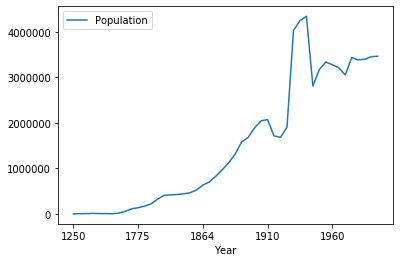

In [8]:
%matplotlib inline
# concatenate all tables on population statistics
overall_population = pd.concat(berlin_population[2:5])
# extract the years
overall_population.Year = overall_population.Year.str.extract('(\d{4})', expand=False)
# set the index to the year column, so plotting is nicer
overall_population = overall_population.set_index("Year")
overall_population.plot();

# Getting tabular data from web pages with ``pandas``

- Birth statistics from [Berlin data portal](https://daten.berlin.de/datensaetze)
- [https://en.wikipedia.org/wiki/Berlin_population_statistics](https://en.wikipedia.org/wiki/Berlin_population_statistics)


## Birth statistics of Berlin

Birth statistics can be obtained through the [Berlin data portal](https://daten.berlin.de/datensaetze)

E.g. [https://www.berlin.de/daten/liste-der-vornamen-2014/charlottenburg-wilmersdorf.csv](https://www.berlin.de/daten/liste-der-vornamen-2014/charlottenburg-wilmersdorf.csv)

```
vorname;anzahl;geschlecht
Marie;118;w
Sophie;92;w
Charlotte;76;w
Maria;73;w
Maximilian;66;m
Alexander;53;m
Emilia;52;w
```


In [9]:
basedir = os.path.join("data","vornamen")
os.makedirs(basedir, exist_ok=True)

base_url = "https://www.berlin.de/daten/liste-der-vornamen-{}/{}.csv"

boroughs = [
"charlottenburg-wilmersdorf",
"friedrichshain-kreuzberg",
"lichtenberg",
"marzahn-hellersdorf",
"mitte",
"neukoelln",
"pankow",
"reinickendorf",
"spandau",
"steglitz-zehlendorf",
"tempelhof-schoeneberg",
"treptow-koepenick"
]

years = range(2013,2018)

In [10]:
# download all name files from Berlin open data portal
all_names = []

for borough in boroughs:
    for year in years:
        try:
            url = base_url.format(year, borough)
            filename = os.path.join(basedir, "{}-{}.csv".format(year,borough))
            urllib.request.urlretrieve(url, filename)
            df_vornamen_stadtteil = pd.read_csv(filename,sep=';',error_bad_lines=False)
            df_vornamen_stadtteil['borough'] = borough
            df_vornamen_stadtteil['year'] = year
            all_names.append(df_vornamen_stadtteil)
        except:
            print("File {} not found".format(url))

# concatenate DataFrames
all_names_df = pd.concat(all_names, sort=True)

In [11]:
all_names_df.sample(n=10)

,anzahl,borough,geschlecht,position,vorname,year
2837,1,tempelhof-schoeneberg,w,NaN,Rehaf,2014
1393,1,lichtenberg,m,2.0,Riccardo,2017
1117,1,mitte,w,NaN,Aimee,2015
2789,1,charlottenburg-wilmersdorf,w,NaN,Rika,2013
712,1,marzahn-hellersdorf,m,2.0,Volker,2017
691,1,marzahn-hellersdorf,w,NaN,Marlott,2014
3060,1,charlottenburg-wilmersdorf,m,NaN,Sanjay,2015
740,1,treptow-koepenick,m,NaN,Len,2016
3564,1,tempelhof-schoeneberg,w,1.0,Hyam,2017
2217,1,mitte,w,NaN,Iwinosa,2016


# Beautiful Soup for Web Scraping

- HTML pages are often not well structured
- [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/)
    - tidies up dirty HTML
    - allows for convenient parsing of HTML


## A Simple Webpage



In [12]:
a_simple_webpage = \
"""<html>
    <head>
    </head>
    <body>
        <p>
            A paragraph
        </p>
        <p id="second_paragraph">
           Another paragraph with a <a href="https://de.wikipedia.org/wiki/Beuth_(Lokomotive)">link</a>
        </p>
    </body>
</html>"""

In [13]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(a_simple_webpage, 'html.parser')

In [14]:
list(soup.children)


[<html>
 <head>
 </head>
 <body>
 <p>
             A paragraph
         </p>
 <p id="second_paragraph">
            Another paragraph with a <a href="https://de.wikipedia.org/wiki/Beuth_(Lokomotive)">link</a>
 </p>
 </body>
 </html>]

### Extracting Texts

In [15]:
paragraphs = soup.find_all('p')
paragraphs

[<p>
             A paragraph
         </p>,
 <p id="second_paragraph">
            Another paragraph with a <a href="https://de.wikipedia.org/wiki/Beuth_(Lokomotive)">link</a>
 </p>]

In [16]:
[p.get_text().strip() for p in paragraphs]

['A paragraph', 'Another paragraph with a link']

### Extracting Links

In [17]:
links = soup.find_all('a')
links

[<a href="https://de.wikipedia.org/wiki/Beuth_(Lokomotive)">link</a>]

In [18]:
links[0].get('href')

'https://de.wikipedia.org/wiki/Beuth_(Lokomotive)'

### Extracting Arbitrary Elements

In [19]:
[x.get_text().strip() for x in soup.find_all(id="second_paragraph")]

['Another paragraph with a link']

# Getting Data From REST APIs

[Representational State Transfer (REST)](https://en.wikipedia.org/wiki/Representational_state_transfer) is a software architectural style for creating web services

RESTful web services allow to access and manipulate web resources through a uniform and predefined set of stateless operations

## Example: Air Quality Data from AQICN

- Air quality is an important topic
- You can query recent worldwide air quality data through an API at [http://aqicn.org/](http://aqicn.org/)
- For example: 
    - [Air Quality Data Berlin](https://aqicn.org/city/germany/berlin)
    - For accessing the API, get an access token
    - then you can query the data for Berlin by requesting (in a browser or in a programmatic fashion)
        ``http://api.waqi.info/feed/berlin/?token=[accessToken]``
    - e.g. [http://api.waqi.info/feed/berlin/?token=my_access_token](http://api.waqi.info/feed/berlin/?token=7672327f1d6675ef5d2d554b63b6175afec9fe77)




In [20]:
import requests

def get_air_quality_data(city, accesstoken='7672327f1d6675ef5d2d554b63b6175afec9fe77'):
    # build request
    url = 'http://api.waqi.info/feed/'+city+'/?token=' + accesstoken
    # get data
    r = requests.get(url, auth=('user', 'pass'))
    # check status code and return data
    if r.status_code == 200:
        data = r.json()
        return data['data']

get_air_quality_data('berlin')

{'aqi': 22,
 'idx': 6132,
 'attributions': [{'url': 'http://www.stadtentwicklung.berlin.de/umwelt/luftqualitaet/',
   'name': 'Berlin Air Quality - (Luftqualität in Berlin)',
   'logo': 'Germany-Berlin.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [52.5200066, 13.404954],
  'name': 'Berlin, Germany',
  'url': 'https://aqicn.org/city/germany/berlin'},
 'dominentpol': 'o3',
 'iaqi': {'h': {'v': 69.2},
  'no2': {'v': 7.8},
  'o3': {'v': 22.4},
  'p': {'v': 1012.9},
  'pm10': {'v': 21},
  't': {'v': 19},
  'w': {'v': 7.7},
  'wg': {'v': 12.2}},
 'time': {'s': '2020-06-15 00:00:00', 'tz': '+02:00', 'v': 1592179200},
 'debug': {'sync': '2020-06-15T07:35:36+09:00'}}

In [21]:
get_air_quality_data('newyork')

{'aqi': 12,
 'idx': 3309,
 'attributions': [{'url': 'http://www.dec.ny.gov/',
   'name': 'New York State Department of Environmental Conservation (NYSDEC)',
   'logo': 'US-NYDEC.png'},
  {'url': 'http://www.airnow.gov/', 'name': 'Air Now - US EPA'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [40.7127837, -74.0059413],
  'name': 'New York',
  'url': 'https://aqicn.org/city/newyork'},
 'dominentpol': 'pm25',
 'iaqi': {'co': {'v': 1.3},
  'h': {'v': 62},
  'no2': {'v': 2.5},
  'o3': {'v': 15.2},
  'p': {'v': 1027.3},
  'pm25': {'v': 12},
  't': {'v': 20.5},
  'w': {'v': 7.6}},
 'time': {'s': '2020-06-14 16:00:00', 'tz': '-04:00', 'v': 1592150400},
 'debug': {'sync': '2020-06-15T07:18:45+09:00'}}

In [22]:
get_air_quality_data('seoul')

{'aqi': 72,
 'idx': 5508,
 'attributions': [{'url': 'http://www.airkorea.or.kr/',
   'name': 'South Air Korea Environment Corporation (대기오염실시간공개시스템)',
   'logo': 'SouthKorea-AirKorea.png'},
  {'url': 'https://www.airkorea.or.kr/',
   'name': 'South Air Korea Environment Corporation (대기오염실시간공개시스템)',
   'logo': 'SouthKorea-AirKorea.png'},
  {'url': 'http://cleanair.seoul.go.kr/',
   'name': 'Seoul Clean Air Pollution Information (서울특별시 기후대기환경정보)',
   'logo': 'SouthKorea-Seoul.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [37.566535, 126.9779692],
  'name': 'Seoul (서울)',
  'url': 'https://aqicn.org/city/seoul'},
 'dominentpol': 'pm25',
 'iaqi': {'co': {'v': 4.5},
  'h': {'v': 84},
  'no2': {'v': 13},
  'o3': {'v': 32},
  'p': {'v': 1007.4},
  'pm10': {'v': 29},
  'pm25': {'v': 72},
  'r': {'v': 0.2},
  'so2': {'v': 4.3},
  't': {'v': 18.7},
  'w': {'v': 2},
  'wd': {'v': 202.5}},
 'time': {'s': '2020-06-15 07:00:00', 'tz': '+09:00', '

# The Problem with Open Data: Accessibility

- Many great open data efforts
- Berlin is pushing this topic
- But often, even though data is theoretically open, it is hard to obtain:
 - Only available in unstructured form (pdfs)
 - Not available in sufficient detail or quality
 

## Example: Parliament Speech Protocols

- The German parliament, Bundestag, has an [open data initiative](https://www.bundestag.de/services/opendata)
- It also provides protocols of all speeches
- These are publicly available and in excellent formatting as of recently
- But downloading them in batch is not supported

### Automating download of all xml files
- open browser's developer tools
- inspect elements of xml file links to find relevant urls

``
<a title="XML | 502 KB" class="bt-link-dokument" href="/resource/blob/683006/ac5b8dca730977167d9d2b671fc966f6/19147-data.xml" ...
``

- inspect network tab when clicking next page
- inspect structure of ajax call: 

```https://www.bundestag.de/ajax/filterlist/de/services/opendata/543410-543410/h_49f0d94cb26682ff1e9428b6de471a5b?limit=10&noFilterSet=true&offset=10```

... looks like one could just change the offset to go to the next set of results.

In [23]:
from bs4 import BeautifulSoup
import requests
 
os.makedirs('bundestagsprotokolle', exist_ok=True)

root_url = "https://www.bundestag.de"
url = "https://www.bundestag.de/ajax/filterlist/de/services/opendata/543410-543410/h_49f0d94cb26682ff1e9428b6de471a5b?limit=10&noFilterSet=true&offset="
 
for offset in range(0,300,10):
    protocol_list = requests.get(url + f"{offset}").text
 
    # Passing the source code to BeautifulSoup to create a BeautifulSoup object for it.
    soup = BeautifulSoup(protocol_list, 'lxml')

    # Extracting all the <a> tags into a list.
    tags = soup.find_all('a')

    for link in soup.find_all('a'):
        if link.get('href').endswith('.xml'):
            xml_response = requests.get(root_url + link.get('href'))
            open(os.path.join('bundestagsprotokolle', f'{offset}-' + link.get('href').split('/')[-1]), 'w').write(xml_response.text)


## Extracting Relevant content

Now that we have downloaded the data, let's see what data we can extract. 

Let's focus on speech text, speaker and the reactions from the parliament. 

We first need to find in the content the relevant DOM elements:

In [3]:
soup = BeautifulSoup(open('bundestagsprotokolle/0-19155-data.xml').read())

In [40]:
soup.find_all('ivz-eintrag')[99]

<ivz-eintrag>
<ivz-eintrag-inhalt>Stephan Brandner (AfD)</ivz-eintrag-inhalt><a href="S19226" typ="druckseitennummer">
<seite>19226</seite>
<seitenbereich>C</seitenbereich>
</a>
</ivz-eintrag>

Now let's extract the speeches and reactions

In [41]:
import unicodedata, re

def nrmlz(s):
    return unicodedata.normalize("NFKD",s)

parties = ['GRÜNE', 'LINKE', 'FDP', 'CDU/CSU', 'SPD', 'AfD']

def count_applause_per_party(st):
    return {p:len(re.findall(p,st)) for p in parties}

def parse_comment_for_applause(speech):
    allcounts = {"Beifall-" + p:0 for p in parties}
    for k in speech.find_all('kommentar'):
        if 'Beifall' in k.getText():
            # the first part is usually applause, the rest after ' – ' is other comments
            counts = count_applause_per_party(nrmlz(k.getText()).split(' – ')[0])
            for p in parties:
                allcounts["Beifall-" + p] += counts[p]
    return allcounts

reden = []
for rede in soup.find_all('rede'):
    rede_text = nrmlz(" ".join([x.getText() for x in rede.find_all('p',{'klasse':'J'})]))
    reden.append({
        'redner': rede.find('redner').find('vorname').getText() + "-" + rede.find('redner').find('nachname').getText(),
        'rede': rede_text,
        'n_words': len(rede_text.split(" ")),
        **parse_comment_for_applause(rede)
    })
reden[0]

{'redner': 'Andreas-Scheuer',
 'rede': 'Wir müssen aber auch Kontrolle üben und Vorbereitungen treffen. Zum einen müssen wir kontrollieren, ob die Einschränkungen, die beschlossen wurden, auch eingehalten werden, und zum anderen Vorbereitungen dafür treffen, dass in Phasen ein öffentliches Leben unter Einhaltung der Vorkehrungen zur Eindämmung der Ausbreitung möglich ist. Vor allem müssen wir durch die Mobilität und die Logistik aber auch die Versorgung garantieren und die Ausübung der notwendigen beruflichen Arbeit bzw. Tätigkeit gewährleisten. Wir müssen Rücksicht und Disziplin üben: Rücksicht auf den Nächsten und Disziplin im eigenen Verhalten. Deswegen möchte ich sehr herzlich allen Bürgerinnen und Bürgern danken, die so umsichtig sind, den Vorkehrungen, die die Politik entschieden und beschlossen hat, Rechnung zu tragen. Dass die Bürgerinnen und Bürger das in einem so breiten Konsens mittragen, ist die Basis dafür, dass das Virus sich nicht zusätzlich ausbreitet. Wir als Bundesreg

In [42]:
df = pd.DataFrame(reden)
df

,redner,rede,n_words,Beifall-GRÜNE,Beifall-LINKE,Beifall-FDP,Beifall-CDU/CSU,Beifall-SPD,Beifall-AfD
0,Andreas-Scheuer,Wir müssen aber auch Kontrolle üben und Vorb...,756,0,0,0,2,1,0
1,Dirk-Spaniel,"Trotzdem erleben wir, dass eine Organisation, ...",123,0,0,0,0,0,0
2,Andreas-Scheuer,"Sie wissen, dass auch mein Staatssekretär im ...",131,0,0,0,0,0,0
3,Uwe-Schmidt,Mit Stand vom 31. März 2020 waren 1 649 Schif...,128,0,0,0,0,0,0
4,Andreas-Scheuer,Es gibt keine Auffälligkeiten beim Crewwechse...,177,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
111,Jens-Brandenburg,"Frau Karliczek, dass ausgerechnet Sie jetzt au...",378,0,3,4,0,1,0
112,Nicole-Gohlke,"Jetzt, Frau Ministerin, bieten Sie an, dass di...",281,0,5,0,0,0,0
113,Kai-Gehring,Von den knapp 3 Millionen Studierenden erhalte...,283,0,2,0,1,0,0
114,Astrid-Mannes,In einer Welt befristeter Promotionsstellen is...,439,0,0,0,4,1,0


In [28]:
df.groupby('redner')\
    .agg({"Beifall-" + p:sum for p in parties})\
    .sort_values(by='Beifall-CDU/CSU',ascending=False)

,Beifall-GRÜNE,Beifall-LINKE,Beifall-FDP,Beifall-CDU/CSU,Beifall-SPD,Beifall-AfD
redner,,,,,,
Jens-Spahn,0,2,2,6,5,1
Matthias-Zimmer,0,1,0,5,1,1
Andreas-Scheuer,0,0,1,5,1,1
Volker-Ullrich,0,0,2,5,3,0
Anja-Karliczek,0,0,0,5,5,1
...,...,...,...,...,...,...
Gesine-Lötzsch,0,1,0,0,0,0
Dirk-Spaniel,0,0,0,0,0,0
Matthias-Gastel,0,0,0,0,0,0


In [43]:
import ipywidgets as widgets
from ipywidgets import interactive
 
items = ['All']+sorted(df['redner'].unique().tolist())
 
def view(x=''):
    if x=='All': 
        display(df)
    else:
        display(df[df['redner']==x])

w = widgets.Select(options=items)
interactive(view, x=w)

interactive(children=(Select(description='x', options=('All', 'Albert H.-Weiler', 'Andreas-Mrosek', 'Andreas-S…